In [15]:
%pip install torch
import torch

t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c).unsqueeze(1)
t_u = torch.tensor(t_u).unsqueeze(1)

n_samples = t_u.shape[0]
n_val = int(0.2 * n_samples)

shuffled_indices = torch.randperm(n_samples)

indices_train = shuffled_indices[:-n_val]
indices_val = shuffled_indices[-n_val:]

t_u_train = t_u[indices_train]
t_c_train = t_c[indices_train]

t_u_val = t_u[indices_val]
t_c_val = t_c[indices_val]

t_un_train = 0.1 * t_u_train
t_un_val = 0.1 * t_u_val

You should consider upgrading via the '/home/beleap/projects/Deep-Learning-with-PyTorch/.venv/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [16]:
import torch.nn as nn

linear_model = nn.Linear(1, 1)
linear_model(t_un_val)

tensor([[0.2331],
        [0.4670]], grad_fn=<AddmmBackward0>)

In [17]:
linear_model.weight

Parameter containing:
tensor([[-0.0709]], requires_grad=True)

In [18]:
linear_model.bias

Parameter containing:
tensor([0.8136], requires_grad=True)

In [19]:
x = torch.ones(1)
linear_model(x)

tensor([0.7427], grad_fn=<AddBackward0>)

In [20]:
x = torch.ones(10, 1)
linear_model(x)

tensor([[0.7427],
        [0.7427],
        [0.7427],
        [0.7427],
        [0.7427],
        [0.7427],
        [0.7427],
        [0.7427],
        [0.7427],
        [0.7427]], grad_fn=<AddmmBackward0>)

In [21]:
from torch import optim

linear_model = nn.Linear(1, 1)
optimizer = optim.SGD(linear_model.parameters(), lr=1e-2)

In [22]:
linear_model.parameters()

<generator object Module.parameters at 0x7f74d0303890>

In [23]:
list(linear_model.parameters())

[Parameter containing:
 tensor([[-0.5256]], requires_grad=True),
 Parameter containing:
 tensor([-0.4178], requires_grad=True)]

In [24]:
def training_loop(
    n_epochs, optimizer, model, loss_fn,
    t_u_train, t_u_val,
    t_c_train, t_c_val,
):
    for epoch in range(1, n_epochs + 1):
        t_p_train = model(t_u_train)
        loss_train = loss_fn(t_p_train, t_c_train)
        
        t_p_val = model(t_u_val)
        loss_val = loss_fn(t_p_val, t_c_val)
        
        optimizer.zero_grad()
        loss_train.backward()
        optimizer.step()
        
        if epoch == 1 or epoch % 1000 == 0:
            print(f"Epoch {epoch}, Training loss {loss_train.item():.4f},"
                  f" Validation loss {loss_val.item():.4f}")

In [25]:
linear_model = nn.Linear(1, 1)
optimizer = optim.SGD(linear_model.parameters(), lr=1e-2)

training_loop(
    n_epochs = 3000,
    optimizer = optimizer,
    model = linear_model,
    loss_fn = nn.MSELoss(),
    t_u_train = t_un_train,
    t_u_val = t_un_val,
    t_c_train = t_c_train,
    t_c_val = t_c_val,
)

print()
print(linear_model.weight)
print(linear_model.bias)

Epoch 1, Training loss 83.9302, Validation loss 285.1704
Epoch 1000, Training loss 4.0522, Validation loss 8.8235
Epoch 2000, Training loss 3.2000, Validation loss 3.8073
Epoch 3000, Training loss 3.1598, Validation loss 3.0008

Parameter containing:
tensor([[5.0961]], requires_grad=True)
Parameter containing:
tensor([-16.0120], requires_grad=True)


In [26]:
from torch import nn

seq_model = nn.Sequential(
    nn.Linear(1, 13),
    nn.Tanh(),
    nn.Linear(13, 1)
)
seq_model

Sequential(
  (0): Linear(in_features=1, out_features=13, bias=True)
  (1): Tanh()
  (2): Linear(in_features=13, out_features=1, bias=True)
)

In [27]:
[param.shape for param in seq_model.parameters()]

[torch.Size([13, 1]), torch.Size([13]), torch.Size([1, 13]), torch.Size([1])]

In [28]:
for name, param in seq_model.named_parameters():
    print(name, param.shape)

0.weight torch.Size([13, 1])
0.bias torch.Size([13])
2.weight torch.Size([1, 13])
2.bias torch.Size([1])


In [29]:
from collections import OrderedDict

seq_model = nn.Sequential(OrderedDict([
    ('hidden_linear', nn.Linear(1, 8)),
    ('hidden_activation', nn.Tanh()),
    ('output_linear', nn.Linear(8, 1)),
]))
seq_model

Sequential(
  (hidden_linear): Linear(in_features=1, out_features=8, bias=True)
  (hidden_activation): Tanh()
  (output_linear): Linear(in_features=8, out_features=1, bias=True)
)

In [30]:
for name, param in seq_model.named_parameters():
    print(name, param.shape)

hidden_linear.weight torch.Size([8, 1])
hidden_linear.bias torch.Size([8])
output_linear.weight torch.Size([1, 8])
output_linear.bias torch.Size([1])


In [31]:
seq_model.output_linear.bias

Parameter containing:
tensor([0.2466], requires_grad=True)

In [33]:
from torch import optim

optimizer = optim.SGD(seq_model.parameters(), lr=1e-3)

training_loop(
    n_epochs = 5000,
    optimizer = optimizer,
    model = seq_model,
    loss_fn = nn.MSELoss(),
    t_u_train = t_un_train,
    t_u_val = t_un_val,
    t_c_train = t_c_train,
    t_c_val = t_c_val,
)

print('output', seq_model(t_un_val))
print('answer', t_c_val)
print('hidden', seq_model.hidden_linear.weight.grad)

Epoch 1, Training loss 3.0893, Validation loss 7.0430
Epoch 1000, Training loss 2.8431, Validation loss 8.9154
Epoch 2000, Training loss 2.6978, Validation loss 7.4641
Epoch 3000, Training loss 2.5837, Validation loss 6.3105
Epoch 4000, Training loss 2.4913, Validation loss 5.3901
Epoch 5000, Training loss 2.4159, Validation loss 4.6571
output tensor([[25.6342],
        [ 7.8791]], grad_fn=<AddmmBackward0>)
answer tensor([[28.],
        [ 8.]])
hidden tensor([[  0.3862],
        [ -0.2908],
        [-14.7536],
        [-13.9049],
        [-13.4576],
        [  0.3315],
        [ -0.4420],
        [ 15.0089]])


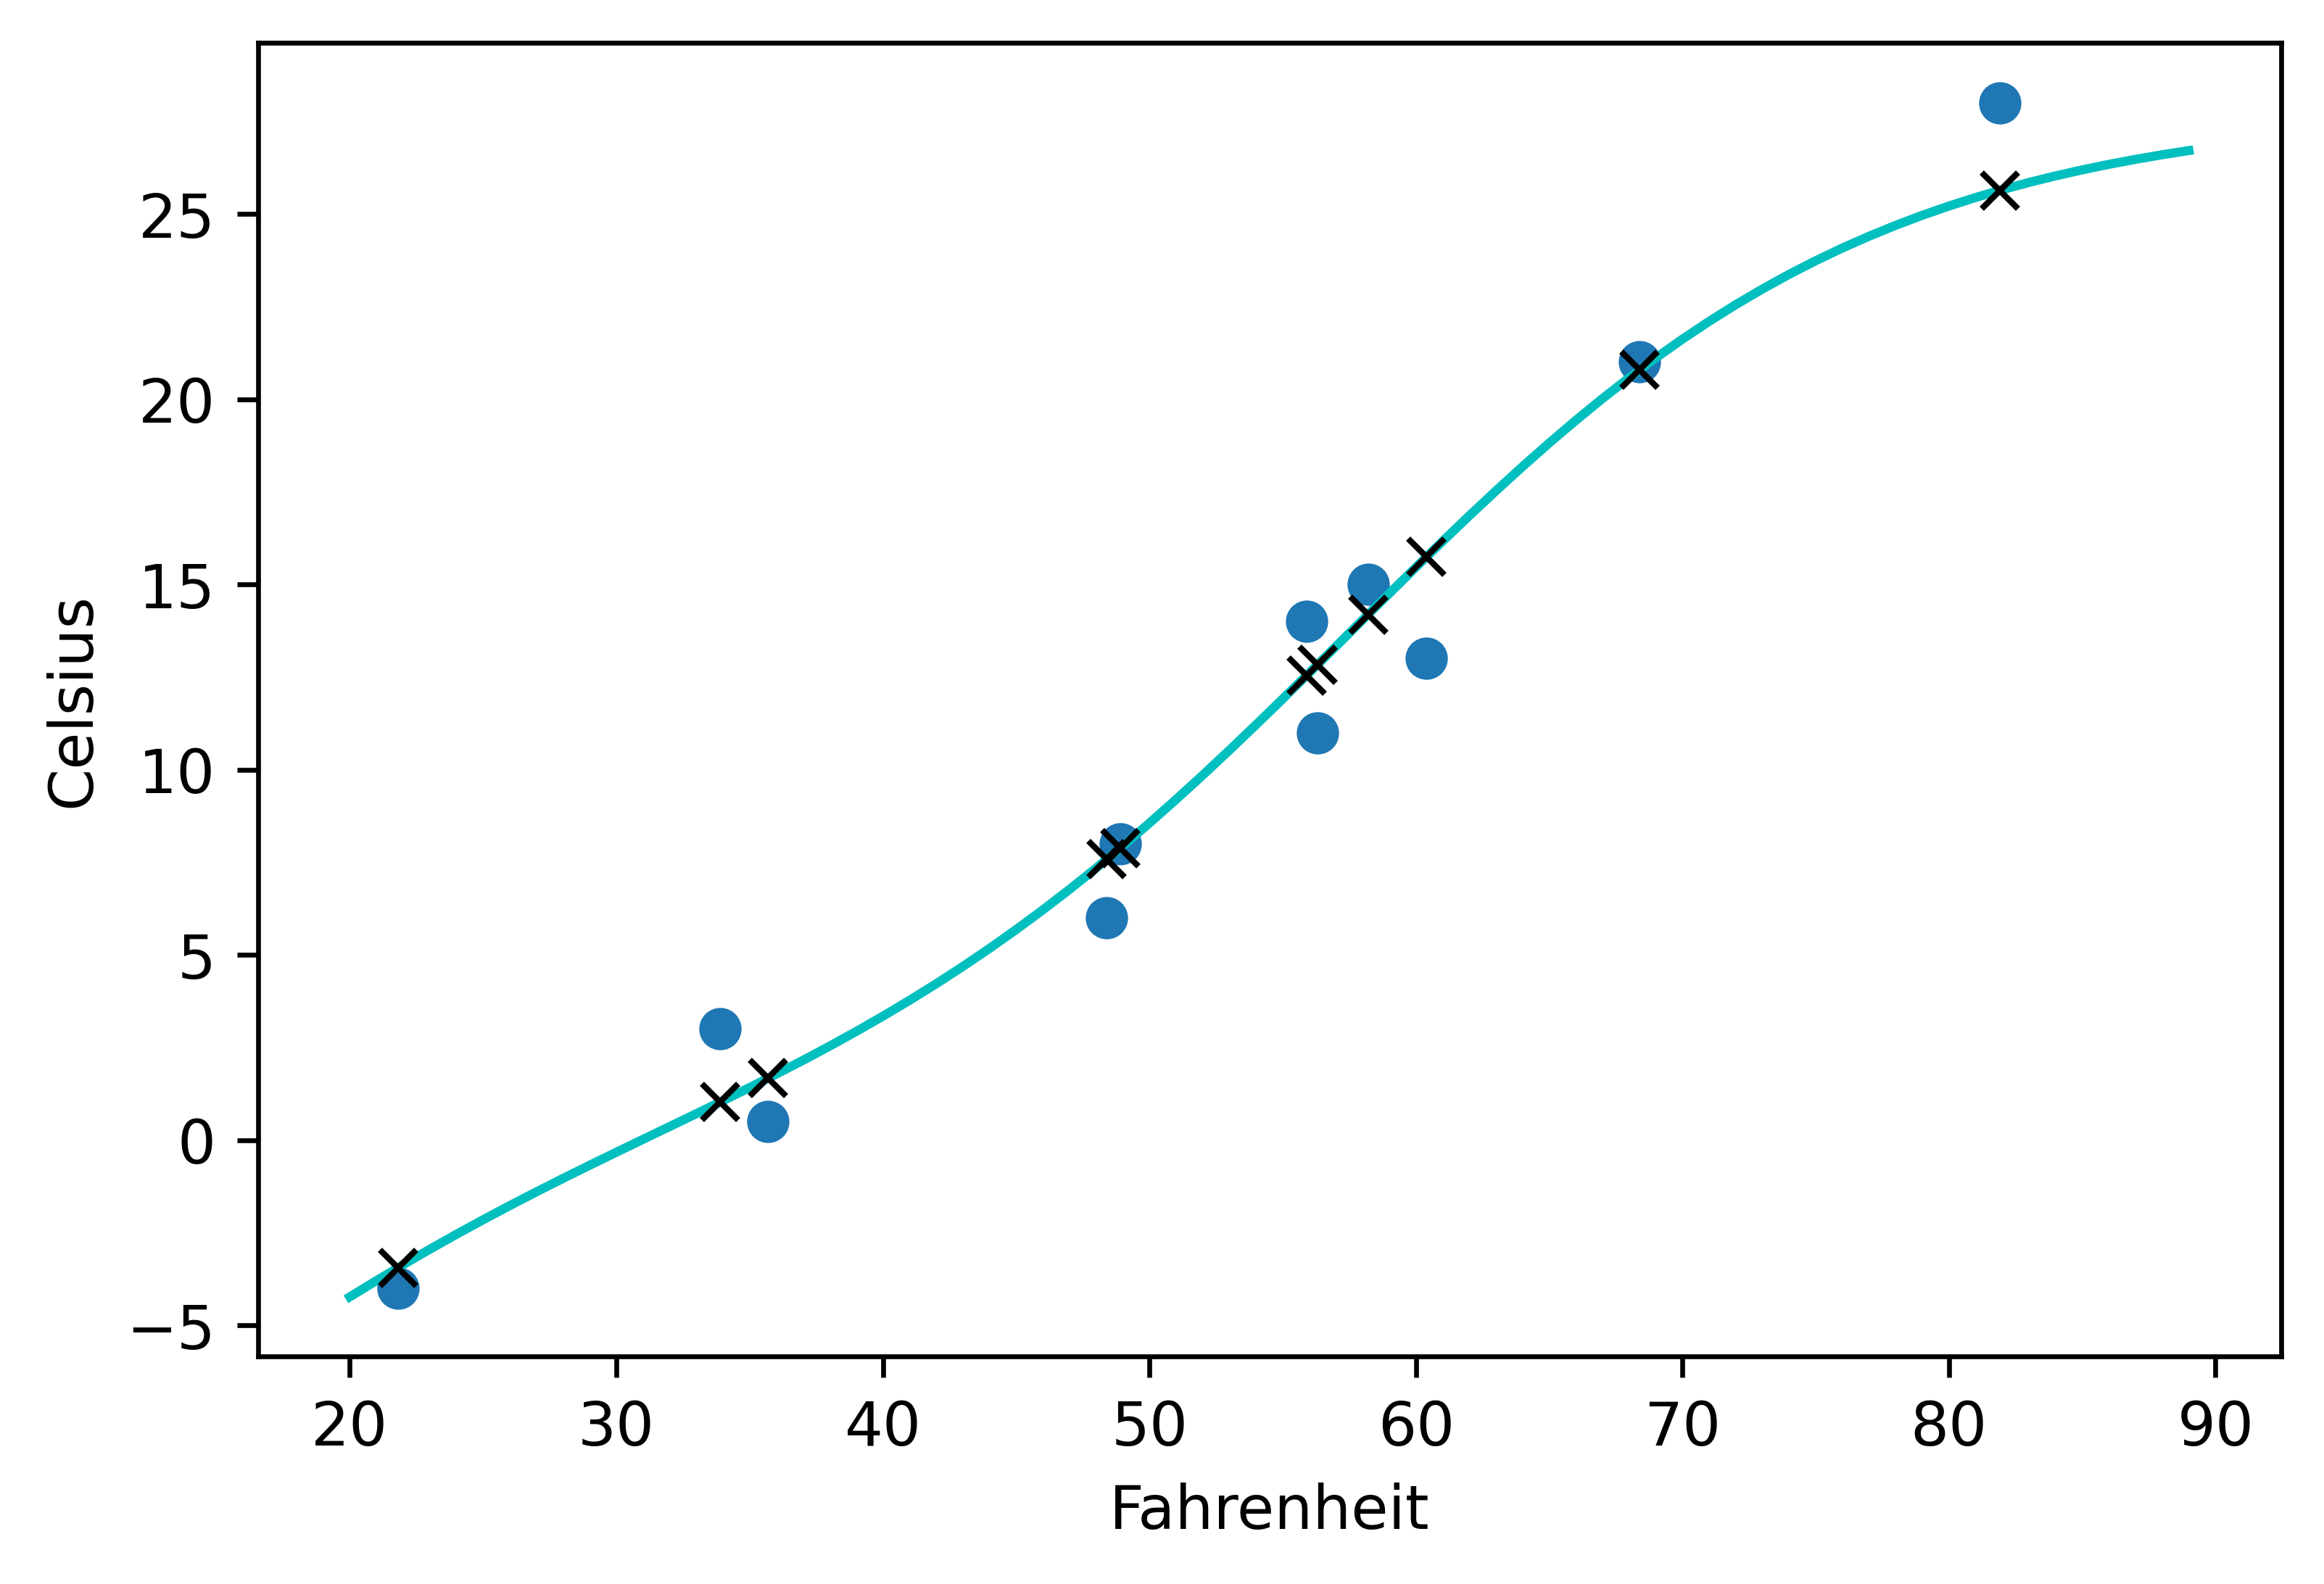

In [34]:
from matplotlib import pyplot as plt

t_range = torch.arange(20., 90.).unsqueeze(1)
fig = plt.figure(dpi=600)

plt.xlabel("Fahrenheit")
plt.ylabel("Celsius")
plt.plot(t_u.numpy(), t_c.numpy(), 'o')
plt.plot(t_range.numpy(), seq_model(0.1 * t_range).detach().numpy(), 'c-')
plt.plot(t_u.numpy(), seq_model(0.1 * t_u).detach().numpy(), 'kx')